# Pyplot
* Vi ser nøyere på plotting:
  - subplot
  - stolpediagram
  - kakediagram

## Subplot - Flere typer grafer/plot i samme figur
* Vi kan lage subplot med matplotlib
* Vi kaller da `plt.subplot(«antall rader», «antall kolonner», «plotnummer»)`

### Eksempel (Med curve_fit)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

tid_aar = list(range(2001,2024))
brukere = np.array([400e3, 796e3, 1.41e6, 2.48e6, 4.02e6,6.15e6,7.32e6,9.16e6,11.89e6,
           18.26e6,24.30e6,30.36e6,41.43e6,54.47e6,70.83e6,89.09e6,110.64e6,139.25e6,
           167.09e6,203.66e6,221.84e6,230.75e6,260.28e6])


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22.]
parametre: K: 292637735.88300395 r: 0.3853952021077847
[5.60400691e+06 2.29649879e-03]
(array([2.78202771e+08, 3.79479813e-01]), array([3.07072701e+08, 3.91310591e-01]))
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]


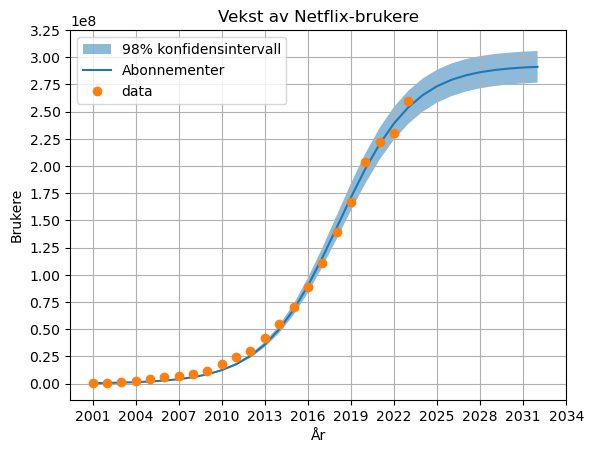

[0.99, 0.771356783919598, 0.7588652482269505, 0.6209677419354838, 0.5298507462686568, 0.19024390243902434, 0.2513661202185793, 0.2980349344978166, 0.535744322960471, 0.3307776560788609, 0.24938271604938267, 0.36462450592885376, 0.3147477673183683, 0.3003488158619423, 0.25780036707609777, 0.2418902233696263, 0.258586406362979, 0.19992818671454216, 0.21886408522353218, 0.08926642443287824, 0.04016408222142087, 0.12797399783315266]


In [81]:
from scipy.optimize import curve_fit
from scipy.stats import norm

start_t = 2001 #Startår
slutt_t = 2023 #Sluttår
n_t = slutt_t-start_t #Antall år

tid0 = np.linspace(0,n_t, n_t+1) # Tid etter strartår [0,1,2,3...,n_t-1]
print(tid0)

def logistic_function(t,K,r): #Logistisk vekstmodell
    P0 = 400e3
    A = (K-P0)/P0
    return K/(1+A*np.exp(-r*t))

def sjekk_parametre():
    """
    Vi printer ut data og logistisk ligning
    for et knippe verdier slik at vi har et utgangspunkt
    til å tilpasse modellen vår (startverdier)
    """
    K = np.linspace(2.5e8, 3.5e8, 10) #K-verdier vi vil sjekke (mellom 25e8 og 35e8, 10 verdier)
    r = np.linspace(0.2,0.4,3)
    for Ki in K: #For alle K'er
        plt.figure(figsize=(15,5)) #Sett figurstørrelse
        for i,ri in enumerate(r): #For alle r (0,r0), (1, r1), (2, r2)
            plt.subplot(1,3,i+1) #Vi plotter 1 rad med 3 kolonner, nå plotter vi i figur i+1
            plt.plot(tid0, logistic_function(tid0,Ki,ri)) #Logistisk vekst med gjeldene parametre
            plt.plot(tid0, brukere, 'o') #Dataen vi tilpasser
            plt.title(f"r = {ri} ,K={Ki}")
        plt.show()
    # r = 0.3 og K = 30e8 ser fornuftig ut
    return None

#sjekk_parametre()

#plt.plot(tid0, brukere)
#plt.show()

#curve_fit tilpasser parametrene til å passe med datapunktene (x,y) fra tid0 og dataene våre
#Vi starter tilpasningene med parametrene i P0
#params inneholder de tilpassede parametrene
#cov er en matrise hvor variansen til parametrene ligger langs diagonalen
params, cov = curve_fit(logistic_function, tid0, brukere, p0=[3.0e8, 0.3])


print(f"parametre: K: {params[0]} r: {params[1]}")
standard_avvik = np.sqrt(np.diag(cov)) #Vi kan finne standardavvik til parametrene ved å ta kvadratroten av diagonalen
print(standard_avvik)

confidence_interval = norm.interval(0.99, loc=params, scale=standard_avvik) #Gir et 99% konfidensintervall for parametrene
print(confidence_interval)
K_mean = params[0] #Forventet K
r_mean = params[1] #Forventet r
K_min = confidence_interval[0][0] #Minste K
K_max = confidence_interval[1][0] #Største K
r_min = confidence_interval[0][1] #minste r
r_max = confidence_interval[1][1] #største r

def logistic_function_errorbars(t):
    """
    Vi regner ut vekst etter t år med konfidensintervallet fra tidligere
    """
    minst = logistic_function(t,K_min,r_min)
    middel = logistic_function(t,K_mean, r_mean)
    maks = logistic_function(t, K_max, r_max)
    return [minst, middel, maks]

tid_fit = np.arange(0, n_t+10,1.0) # Utvider tiden for å simulere netflix' vekst
print(tid_fit)
brukere_fit = logistic_function_errorbars(tid_fit) #Kaller funskjon for å regne ut vekst med konfidensintervall


#plt.fillbetween fyller ut området mellom to grafer (x, f1(x), f2(x)), alpha gjør fyllet gjennomsiktig
plt.fill_between(tid_fit, brukere_fit[0], brukere_fit[2], alpha=0.5, label="98% konfidensintervall")
plt.plot(tid_fit, brukere_fit[1], label="Abonnementer") #Plotter tilpasset graf
plt.plot(tid0, brukere, 'o', label="data") #Plotter data vi har hentet prikkeplott
plt.title("Vekst av Netflix-brukere")
plt.xlabel("År")
plt.ylabel("Brukere")
plt.legend()
plt.grid()

#Vi vil forandre verdiene på x-aksen til å være årstall og ikke antall år etter start
#lokasjon er en liste med alle verdiene vi vil a et "tick" på aksen
lokasjon = np.arange(0,35,3)

#Vi lager en liste label_akse som inneholder hvilken "tekst" vi vil ha på x-aksen
labels_akse = []
for lok in lokasjon:
    labels_akse.append(lok+start_t)

#xticks oppdaterer hvor vi vil a "ticks" på x-aksen (lokasjon) og hva som skal stå der (labels_akse)
plt.xticks(ticks = lokasjon, labels=labels_akse)
plt.yticks(ticks=np.arange(0, 3.5e8, 0.25e8)) # Vi angir hvor vi vil a ticks på y-aksen
plt.show()


**Studer nøye hvordan vi plottet figuren i forrige eksempel**

## Lånekalkulator: Stolpediagram og Kakediagram
* Tidligere lagde vi denne lånekalkulatoren

Hva er ønsket terminbelop? 1000


Gyldig terminbeløp gitt -- kalkulering fortsetter


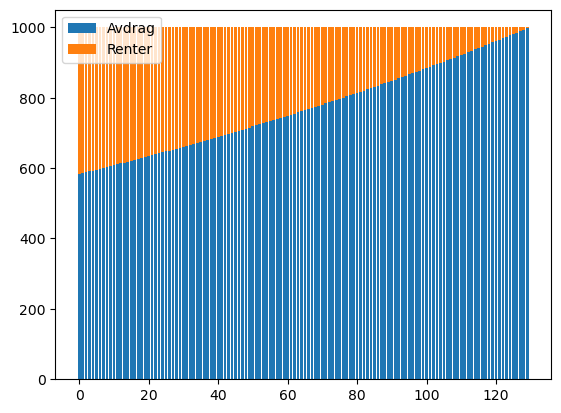

Nedbetalingstiden på 11 år og 10 måneder er for lenge
Renter [4837.334296557354, 4470.878725276828, 4085.674591480256, 3680.7626831267617, 3255.134713066989, 2807.730808267409, 2337.4368705785837, 1843.0818024753253, 1323.43459086045, 777.2012416704074]


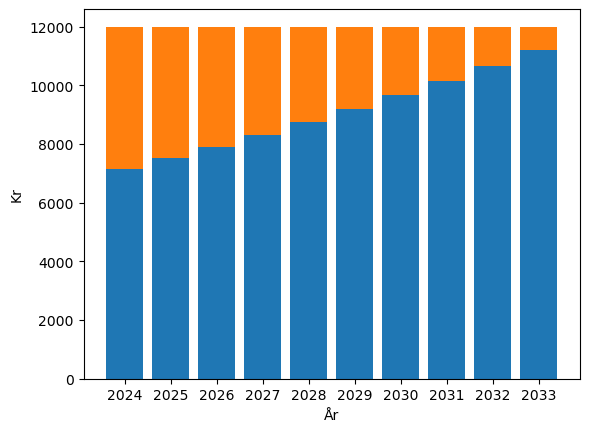

In [11]:
# Annuitetslån
import matplotlib.pyplot as plt

laan = 100000
rentesats = 0.05
terminbelop = float(input("Hva er ønsket terminbelop?"))
max_nedbetalingstid = 10 #år

def sjekk_terminbelop(terminbelop,r,L):
    renter = laan*rentesats/12
    if terminbelop<renter:
        print("Terminbeløpet på", terminbelop, "er for lite")
        print("Første renteavregning er på", renter, "kr")
        return False
    else:
        return True
    
if sjekk_terminbelop(terminbelop, rentesats, laan):
    print("Gyldig terminbeløp gitt -- kalkulering fortsetter")
    avdragsliste = []
    renteliste = []
    mnd = 0
    while laan > 0:
        renter = laan*rentesats/12
        avdrag = terminbelop-renter
        laan = laan - avdrag
        #laan -= termterminbelop
        renteliste.append(renter)
        avdragsliste.append(avdrag)
        mnd += 1
        #mnd = mnd +1

    tid_liste = list(range(mnd))

    plt.bar(tid_liste, avdragsliste, label="Avdrag")
    plt.bar(tid_liste, renteliste, label="Renter", bottom=avdragsliste)
    plt.legend()
    plt.show()
    
    if mnd/12 > max_nedbetalingstid:
        print(f"Nedbetalingstiden på {mnd/12:.0f} år og {mnd%12} måneder er for lenge")
    
    avdrag_aarlig = []
    renter_aarlig = []
    
    n_aar = mnd//12
    aar_liste = list(range(n_aar))
    
    for aar in aar_liste:
        avdrag = avdragsliste[aar*12:(aar+1)*12]
        renter = renteliste[aar*12:(aar+1)*12]
        avdrag_aarlig.append(sum(avdrag))
        renter_aarlig.append(sum(renter))
    
    print("Renter", renter_aarlig)
    
    startaar = 2024
    aarstall_liste = []
    for y in aar_liste:
        aarstall = f"{startaar+y}"
        aarstall_liste.append(aarstall)
        
    plt.bar(aarstall_liste, avdrag_aarlig, label="Avdrag")
    plt.bar(aarstall_liste, renter_aarlig, label="Renter", bottom=avdrag_aarlig)
    plt.xlabel("År")
    plt.ylabel("Kr")
    plt.show()
    
    
else:
    print("Ugyldig terminbeløp gitt -- programmet stopper")






* Den kan vi jobbe mer med

# Histogram

Listen inneholder data om 2000 kunder.
For hver kunde har vi data om ['fornavn', 'etternavn', 'startsaldo']


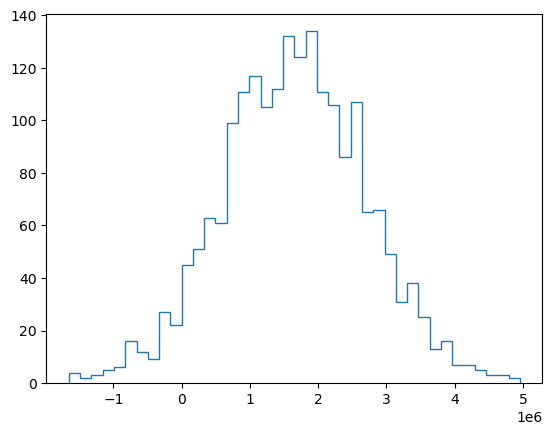

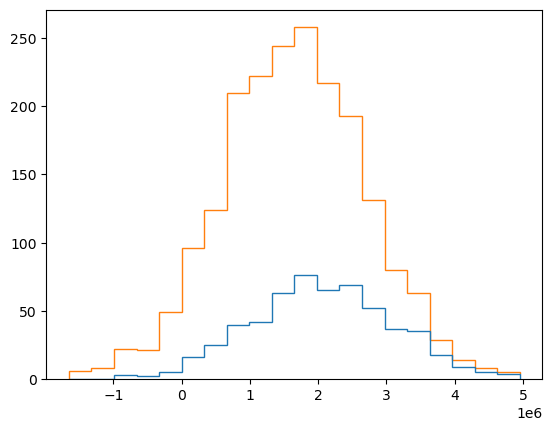

(array([1.31899518e-08, 1.64874398e-08, 1.31899518e-08, 2.30824157e-08,
        5.93547831e-08, 2.96773916e-08, 8.57346867e-08, 1.02222126e-07,
        1.91254301e-07, 1.91254301e-07, 1.91254301e-07, 3.82508602e-07,
        3.69318651e-07, 3.69318651e-07, 3.79211114e-07, 3.75913626e-07,
        3.79211114e-07, 3.52831211e-07, 2.86881452e-07, 2.80286476e-07,
        1.94551789e-07, 1.68171886e-07, 8.24371988e-08, 9.23296626e-08,
        3.29748795e-08, 2.30824157e-08, 1.64874398e-08, 1.31899518e-08,
        9.89246385e-09, 3.29748795e-09]),
 array([-1652261.95573594, -1440782.76912501, -1229303.58251408,
        -1017824.39590315,  -806345.20929223,  -594866.0226813 ,
         -383386.83607037,  -171907.64945944,    39571.53715149,
          251050.72376242,   462529.91037335,   674009.09698428,
          885488.28359521,  1096967.47020614,  1308446.65681707,
         1519925.84342799,  1731405.03003892,  1942884.21664985,
         2154363.40326078,  2365842.58987171,  2577321.77648264,

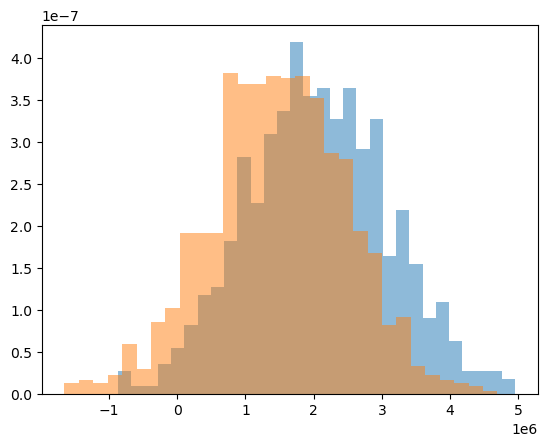

In [71]:
import json
import random

with open("kundedata1.json", 'r') as file:
    kundedata = json.load(file)
info = f"""Listen inneholder data om {len(kundedata)} kunder.
For hver kunde har vi data om {list(kundedata[0].keys())}"""
print(info)

for kunde in kundedata:
    del kunde["startsaldo"]
    kunde["utdanning_tid"] = 9+random.random()*11
    formue_snitt = 200e3 + 100e3*kunde["utdanning_tid"]
    kunde["formue"] = random.gauss(mu=formue_snitt, sigma=1e6)


formue_liste = [ kunde["formue"] for kunde in kundedata ]
plt.hist(formue_liste, bins=40, histtype="step")
plt.show()

formue_rike = [ kunde["formue"] for kunde in kundedata if kunde["utdanning_tid"]>17]
formue_andre = [ kunde["formue"] for kunde in kundedata if kunde["utdanning_tid"]<=17]

plt.hist([formue_rike, formue_andre], bins=20, histtype="step", stacked=True)
plt.show()

plt.hist(formue_rike, bins=30, alpha=0.5, density=True)
plt.hist(formue_andre, bins=30, alpha=0.5, density=True)